# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
#### 1. Import libraries and dataframe
#### 2. Create Crosstab 
#### 3. Python Text Editor
#### 4. Data Security
#### 5. Create a regional segmentation of the data
#### 6. Determine difference in spending habits between the different U.S. regions
#### 7. Create an exclusion flag for low-activity customers

#### 1. Import libraries and dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path and import dataframe
path = r'C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 8-12\2023-08-28 Instacart Basket Analysis'
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust.pkl'))

In [3]:
# Output check
ords_prods_cust.shape

(32404859, 35)

#### 2. Create Crosstab 

In [4]:
# Create Crosstab 
crosstab = pd.crosstab(ords_prods_cust['days_since_prior_order'], ords_prods_cust['order_number'], dropna = False)

In [5]:
# Copy the table to clipboard, paste it into Excel
crosstab.to_clipboard()

In [6]:
# Output check
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


#### 3. Python Text Editor

In [7]:
# Copy all the columns
ords_prods_cust.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'Spending_flag', 'median_days_order', 'frequency_flag', 'name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'dependants_number',
       'fam_status', 'income'],
      dtype='object')

Further steps according to the exercise performed in Excel.

In [8]:
# Option to do it in Python: Filtering out columns that have 'day' in column name
day_columns = [col for col in ords_prods_cust.columns if 'day' in col]

# Creating a subset df for just these columns 
subset = ords_prods_cust[day_columns]

In [9]:
# Output check
subset.head()

,orders_day_of_week,order_hour_of_day,days_since_prior_order,busiest_day,busiest_days,busiest_period_of_day,median_days_order
0,2,8,NaN,Regularly busy,Regularly busy days,Average orders,20.5
1,3,7,15.0,Regularly busy,Least busy days,Average orders,20.5
2,3,12,21.0,Regularly busy,Least busy days,Most orders,20.5
3,4,7,29.0,Least busy,Least busy days,Average orders,20.5
4,4,15,28.0,Least busy,Least busy days,Most orders,20.5


#### 4. Data Security

PII elements, columns in the data set:
'name',
'surname'
The Instacart company must decide what to do with this data so as not to violate customer privacy

#### 5.Create a regional segmentation of the data

In [10]:
# Sort 'state' column
ords_prods_cust['state'].value_counts().sort_index()

state
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

In [11]:
# Change the datatype of 'state' column
ords_prods_cust['state'] = ords_prods_cust['state'].astype('category')

In [12]:
# Creating a if-statement
result= []
for state in ords_prods_cust['state']:
  if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('1 Northeast')
  elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('2 Midwest')
  elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('3 South')
  elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append('4 West')
  else:
    result.append('error')

In [13]:
# Creating a new column'region'
ords_prods_cust['region'] = result

In [14]:
# Frequency check of regions column
ords_prods_cust['region'].value_counts(dropna = False)

region
3 South        10791885
4 West          8292913
2 Midwest       7597325
1 Northeast     5722736
Name: count, dtype: int64

In [15]:
# Check output
ords_prods_cust.shape

(32404859, 36)

#### 6. Determine difference in spending habits between the different U.S. regions

In [16]:
# Create crosstab of regions and spending flag columns
crosstab_region_sflag = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['Spending_flag'], dropna = False)

In [17]:
# Check output
crosstab_region_sflag

Spending_flag,High spender,Low spender
region,,
1 Northeast,108225,5614511
2 Midwest,155975,7441350
3 South,209691,10582194
4 West,160354,8132559


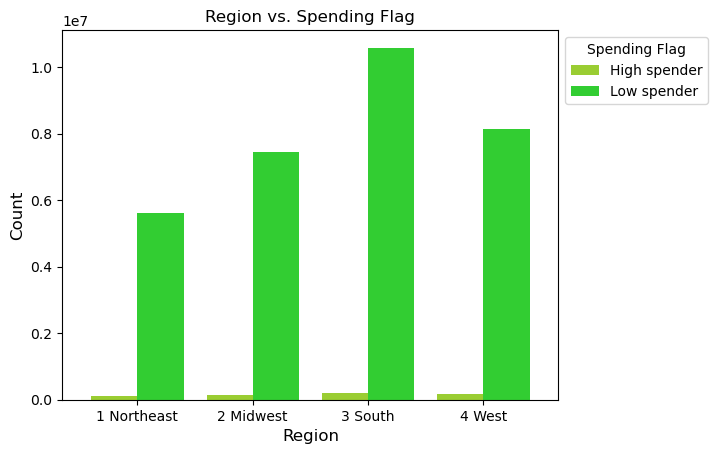

In [20]:
# Code help find with AI and internet search
# Make sure 'region' and 'Spending_flag' columns are in the DataFrame
crosstab_region_sflag = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['Spending_flag'], dropna=False)

# Define a custom color palette
custom_palette = ["yellowgreen", "limegreen"]

# Plot the chart with the custom color palette
crosstab_region_sflag.plot(kind='bar', color=custom_palette, width=0.8)  # Adjust width for grouped bars

# Add labels and a title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Region vs. Spending Flag', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the legend
plt.legend(title='Spending Flag', loc="upper left", bbox_to_anchor=(1, 1))

# Save the chart as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_flag_chart.png'))

# Show the chart
plt.show()

Calculating the results as a percentage, the number of high spending flags is a small percentage (exactly 1.96 % of the whole database) compared to customers matched in the low spending flag.
On the chart we can see the graphical difference between the high and low spending flags. There are differences in spending habits in different regions of the US.
The largest percentage is located in the South region of the US, there are also the most customers in the high spending flag category. The Northeast region has the lowest values in both flags.

#### 7. Create an exclusion flag for low-activity customers

In [21]:
# Create a flag for low-activity customers (customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low activity'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high activity'

In [22]:
# Show activity_flag
ords_prods_cust['max_order'].value_counts(dropna = False)

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: count, Length: 99, dtype: int64

In [23]:
low_activity_cust = ords_prods_cust.loc[ords_prods_cust['activity_flag']  == 'low activity']

In [24]:
# Output check
low_activity_cust.shape

(1440295, 37)

In [28]:
low_activity_cust[['order_id','user_id', 'activity_flag']].head(20)

,order_id,user_id,activity_flag
1510,520620,120,low activity
1511,3273029,120,low activity
1512,520620,120,low activity
1513,3273029,120,low activity
1514,520620,120,low activity
1515,906054,120,low activity
1516,3273029,120,low activity
3855,3226575,360,low activity
3856,3046940,360,low activity
3857,2300993,360,low activity


In [29]:
high_activity_cust = ords_prods_cust.loc[ords_prods_cust['activity_flag']  == 'high activity']

In [30]:
# Output check
high_activity_cust.shape

(30964564, 37)

In [33]:
high_activity_cust[['order_id','user_id', 'activity_flag']].head(20)

,order_id,user_id,activity_flag
0,2539329,1,high activity
1,2398795,1,high activity
2,473747,1,high activity
3,2254736,1,high activity
4,431534,1,high activity
5,3367565,1,high activity
6,550135,1,high activity
7,3108588,1,high activity
8,2295261,1,high activity
9,2550362,1,high activity


In [34]:
# Export the dataset low_activity_cust
low_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_cust.pkl'))

In [35]:
# Export the dataset high_activity_cust
high_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_cust.pkl'))

In [36]:
# Export dataframe
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_region.pkl'))